
# Objective: Analyze cities in United States to determine what cities are optimal to live based on Walk Score, cost of living and amenities. 

## Part 1: Cleans the data from [https://www.kaggle.com/datasets/louise2001/us-cities](https://www.kaggle.com/datasets/louise2001/us-cities).

###  This data is sourced from someone else's data set on Kaggle.

### The following code cell uses Pandas to load the data US Cities Dataset. 

In [1]:
import pandas as pd
us_cities = pd.read_csv('us_cities.csv')

import matplotlib.pyplot as plt
import numpy as np




### Let's look at the first few rows of the dataset. 

In [2]:
us_cities.head()

,Unnamed: 0,City,State,Region,Size,Population,AvgRent,MedianRent,UnempRate,AvgIncome,CostOfLiving,PriceParity,CommuteTime,MedianAQI,WalkScore,BikeScore,TransitScore,Latitude,Longitude
0,0,New York,New York,Northeast,Large,20140470.0,3272,2323.0,3.8,85136.0,128.0,114.58,36.7,50.0,88.0,69.3,6.9,40.6943,-73.9249
1,1,Los Angeles,California,West,Large,13200998.0,2857,1925.0,3.9,75821.0,140.6,113.82,30.7,70.0,68.6,58.7,6.2,34.1141,-118.4068
2,2,Chicago,Illinois,Midwest,Large,9618502.0,1975,1364.0,4.2,71992.0,100.1,105.42,31.8,50.0,77.2,72.2,5.1,41.8375,-87.6866
3,3,Dallas,Texas,South,Large,7637387.0,1754,1440.0,3.2,66727.0,98.5,103.85,28.6,51.0,46.0,49.3,2.8,32.7935,-96.7667
4,4,Houston,Texas,South,Large,7122240.0,1620,1216.0,3.9,64837.0,95.8,99.74,30.0,57.0,47.5,48.6,2.8,29.7860,-95.3885


### Let's look at the last few rows of the dataset. 

In [3]:
us_cities.tail()

,Unnamed: 0,City,State,Region,Size,Population,AvgRent,MedianRent,UnempRate,AvgIncome,CostOfLiving,PriceParity,CommuteTime,MedianAQI,WalkScore,BikeScore,TransitScore,Latitude,Longitude
339,339,Grand Island,Nebraska,Midwest,Small,77038.0,860,NaN,2.4,52472.0,88.8,88.90,NaN,21.0,NaN,NaN,0.0,40.9218,-98.3586
340,340,Danville,Illinois,Midwest,Small,74188.0,657,705.0,4.8,49265.0,83.9,88.35,NaN,NaN,NaN,NaN,1.2,40.1426,-87.6111
341,341,Enid,Oklahoma,South,Small,62846.0,994,723.0,2.5,48861.0,82.9,NaN,NaN,NaN,NaN,NaN,0.0,36.4063,-97.8700
342,342,Walla Walla,Washington,West,Small,62584.0,1734,1018.0,4.9,53845.0,100.9,99.17,17.9,37.0,NaN,NaN,2.8,46.0671,-118.3368
343,343,Carson City,Nevada,West,Small,58639.0,1683,1043.0,3.9,60445.0,103.0,94.16,NaN,42.0,NaN,NaN,2.7,39.1511,-119.7476


### Let's look at the shape of the dataset - how many row and columns does it have.

In [4]:
us_cities_shape = us_cities.shape
print(f'The data set has {us_cities_shape[0]} rows and {us_cities_shape[1]} columns.')

The data set has 344 rows and 19 columns.


### Here is a summary of the dataset structure. 

In [5]:
us_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    344 non-null    int64  
 1   City          344 non-null    object 
 2   State         344 non-null    object 
 3   Region        344 non-null    object 
 4   Size          344 non-null    object 
 5   Population    344 non-null    float64
 6   AvgRent       344 non-null    int64  
 7   MedianRent    338 non-null    float64
 8   UnempRate     335 non-null    float64
 9   AvgIncome     344 non-null    float64
 10  CostOfLiving  335 non-null    float64
 11  PriceParity   343 non-null    float64
 12  CommuteTime   289 non-null    float64
 13  MedianAQI     302 non-null    float64
 14  WalkScore     74 non-null     float64
 15  BikeScore     74 non-null     float64
 16  TransitScore  344 non-null    float64
 17  Latitude      344 non-null    float64
 18  Longitude     344 non-null    

### Let's view a statistical summary of the unaltered/uncleaned dataset. 

In [6]:
us_cities.describe()

,Unnamed: 0,Population,AvgRent,MedianRent,UnempRate,AvgIncome,CostOfLiving,PriceParity,CommuteTime,MedianAQI,WalkScore,BikeScore,TransitScore,Latitude,Longitude
count,344.000000,3.440000e+02,344.000000,338.000000,335.000000,344.000000,335.000000,343.000000,289.000000,302.000000,74.000000,74.000000,344.000000,344.000000,344.000000
mean,171.500000,8.091447e+05,1493.375000,1044.568047,3.325373,57241.354651,97.086866,95.097201,23.273702,41.016556,48.402703,51.610811,2.191860,37.974277,-92.980435
std,99.448479,1.752598e+06,499.698727,352.917181,1.279893,12594.193756,13.083548,6.180207,3.837995,8.868721,15.904699,12.466191,1.431178,5.539083,15.822677
min,0.000000,5.863900e+04,657.000000,648.000000,1.600000,34503.000000,82.600000,85.480000,15.700000,10.000000,21.400000,29.700000,0.000000,21.329400,-157.846000
25%,85.750000,1.556702e+05,1160.250000,821.000000,2.500000,49462.000000,88.700000,90.620000,20.600000,38.000000,36.825000,42.025000,1.175000,34.095025,-100.530150
50%,171.500000,2.766250e+05,1393.000000,947.500000,3.100000,54586.500000,93.100000,93.660000,22.800000,42.000000,44.550000,50.900000,2.000000,38.506700,-87.978500
75%,257.250000,6.694870e+05,1736.250000,1165.000000,3.800000,61529.000000,101.400000,98.235000,25.100000,44.000000,60.025000,59.600000,3.000000,41.780325,-81.510075
max,343.000000,2.014047e+07,3422.000000,3000.000000,13.700000,136338.000000,178.600000,119.830000,39.400000,84.000000,88.700000,83.500000,6.900000,64.835300,-68.790600


### Are there rows and columns with null values. 

In [7]:
us_cities.isnull().any(axis = 0)

Unnamed: 0      False
City            False
State           False
Region          False
Size            False
Population      False
AvgRent         False
MedianRent       True
UnempRate        True
AvgIncome       False
CostOfLiving     True
PriceParity      True
CommuteTime      True
MedianAQI        True
WalkScore        True
BikeScore        True
TransitScore    False
Latitude        False
Longitude       False
dtype: bool

### Here is a list of the columns in the dataset. 

In [8]:
us_cities.columns

Index(['Unnamed: 0', 'City', 'State', 'Region', 'Size', 'Population',
       'AvgRent', 'MedianRent', 'UnempRate', 'AvgIncome', 'CostOfLiving',
       'PriceParity', 'CommuteTime', 'MedianAQI', 'WalkScore', 'BikeScore',
       'TransitScore', 'Latitude', 'Longitude'],
      dtype='object')

### Here is a list of the columns.

In [9]:
list(us_cities.columns)

['Unnamed: 0',
 'City',
 'State',
 'Region',
 'Size',
 'Population',
 'AvgRent',
 'MedianRent',
 'UnempRate',
 'AvgIncome',
 'CostOfLiving',
 'PriceParity',
 'CommuteTime',
 'MedianAQI',
 'WalkScore',
 'BikeScore',
 'TransitScore',
 'Latitude',
 'Longitude']

### Let's drop some columns that we won't be using.

In [10]:
us_cities = us_cities.drop(
    [
    'Unnamed: 0',
    'Region',
    'BikeScore',
    'WalkScore',
    'TransitScore',
    'CommuteTime',
    'PriceParity',
    'UnempRate',
    'AvgRent',
    'MedianRent',
    'MedianAQI',    
    'Size'
    ],
    axis=1
)

us_cities.head()

,City,State,Population,AvgIncome,CostOfLiving,Latitude,Longitude
0,New York,New York,20140470.0,85136.0,128.0,40.6943,-73.9249
1,Los Angeles,California,13200998.0,75821.0,140.6,34.1141,-118.4068
2,Chicago,Illinois,9618502.0,71992.0,100.1,41.8375,-87.6866
3,Dallas,Texas,7637387.0,66727.0,98.5,32.7935,-96.7667
4,Houston,Texas,7122240.0,64837.0,95.8,29.7860,-95.3885


In [11]:
print(us_cities.dtypes)

City             object
State            object
Population      float64
AvgIncome       float64
CostOfLiving    float64
Latitude        float64
Longitude       float64
dtype: object


### Let's create a function to change items in a column to integers. We will use this function to convert the data type of Population and AvgIncome to int64. 

In [12]:
def convert_columns_to_int(df, columns):
    for column in columns:
            df[column] = df[column].astype('int64')

In [13]:
convert_columns_to_int(us_cities, ['Population', 'AvgIncome'])

print(us_cities.dtypes)

City             object
State            object
Population        int64
AvgIncome         int64
CostOfLiving    float64
Latitude        float64
Longitude       float64
dtype: object


### Now let's create a function to change items in a column from objects to strings. We will use this function to convert the data type of City and State to strings. 

In [14]:
def convert_columns_to_string(df, columns):
      for column in columns:
            df[column] = df[column].astype('string')



In [15]:
convert_columns_to_string(us_cities, ['City', 'State'])

print(us_cities.dtypes)

City            string[python]
State           string[python]
Population               int64
AvgIncome                int64
CostOfLiving           float64
Latitude               float64
Longitude              float64
dtype: object


### Let's check to see if there are duplicates for any cities in the data set. 

In [16]:
duplicate_city = us_cities[us_cities.duplicated(subset=['City', 'State'])]

print(duplicate_city)

Empty DataFrame
Columns: [City, State, Population, AvgIncome, CostOfLiving, Latitude, Longitude]
Index: []


### Let's rename some of the columns for better readability.

In [17]:
us_cities.rename(columns={'AvgIncome' : 'Avg Income',
                          'CostOfLiving' : 'Cost of Living'
                          },
                          inplace = True)
us_cities.columns

Index(['City', 'State', 'Population', 'Avg Income', 'Cost of Living',
       'Latitude', 'Longitude'],
      dtype='object')

### Let's see how many null values are present in Miles of Trails.

### Let's see what columns have null values. 

In [18]:
us_cities.isnull().any(axis = 0)

City              False
State             False
Population        False
Avg Income        False
Cost of Living     True
Latitude          False
Longitude         False
dtype: bool

### Let's create a function to extract null rows in a data set. We'll use the function to see which rows have null values in the Cost of Living column.

In [19]:
def extract_null_rows(df):
    return df[df.isnull().any(axis=1)]



In [20]:
null_rows_cities = extract_null_rows(us_cities)

print(null_rows_cities)

               City        State  Population  Avg Income  Cost of Living  \
53   Urban Honolulu       Hawaii     1016508       63912             NaN   
58       Bridgeport  Connecticut      957419      127391             NaN   
69           Oxnard   California      843843       73375             NaN   
70       North Port      Florida      833716       69376             NaN   
76       Cape Coral      Florida      760822       62885             NaN   
86          Deltona      Florida      668921       53559             NaN   
92         Palm Bay      Florida      606612       55477             NaN   
178         Norwich  Connecticut      268555       63877             NaN   
251       Sebastian      Florida      159788       95109             NaN   

     Latitude  Longitude  
53    21.3294  -157.8460  
58    41.1918   -73.1954  
69    34.1964  -119.1815  
70    27.0576   -82.1977  
76    26.6443   -81.9957  
86    28.9050   -81.2137  
92    27.9631   -80.6593  
178   41.5495   -72.088

### We will replace the Cost of Living null values with the Cost of Living average for the state in which the city is located. We will do this only for the states that had cities with null values in the dataset. We will write this to a dictionary so that the values are stored. 

In [21]:
states_with_Nan = ['Hawaii', 'Connecticut', 'California', 'Florida']

stateCol_avg = us_cities[us_cities['State'].isin(states_with_Nan)].groupby('State')['Cost of Living'].mean()

stateCol_avg_dict = stateCol_avg.to_dict()

print(stateCol_avg_dict)


{'California': 127.15833333333335, 'Connecticut': 106.25, 'Florida': 100.3, 'Hawaii': nan}


### Now let's use the dictionary for Cost of Living averages (stateCol_avg_dict) for the states that had cities with null values to replace the null values. We'll test to make sure this worked by priting the cities that still have null values. 

In [22]:
us_cities.loc[us_cities['Cost of Living'].isnull(), 'Cost of Living'] = (us_cities['State'].map(stateCol_avg_dict))


print(us_cities[us_cities['Cost of Living'].isnull()])
           


              City   State  Population  Avg Income  Cost of Living  Latitude  \
53  Urban Honolulu  Hawaii     1016508       63912             NaN   21.3294   

    Longitude  
53   -157.846  


#### Let's drop the city of Hawaii as we aren't interested in living outside the continental United States and there is no data to calculate an average Cost of Living for the state of Hawaii. We will then try to print cities with null values to ensure Hawaii has been dropped. 

In [23]:
us_cities = us_cities.drop(us_cities[us_cities['State'] == 'Hawaii'].index)

print(us_cities[us_cities['Cost of Living'].isnull()])

Empty DataFrame
Columns: [City, State, Population, Avg Income, Cost of Living, Latitude, Longitude]
Index: []


## Part 2: cleans the data from [https://www.kaggle.com/datasets/vellis1/us-cities-urban-connectivity/data](https://www.kaggle.com/datasets/vellis1/us-cities-urban-connectivity/data).

### This data set contains information about the amenities available in US Cities including walkability score, miles of trails, etc. This data is sourced from someone else's data set on Kaggle.



In [24]:
import pandas as pd
connectivity = pd.read_csv('urban_connectivity.csv')


### Let's look at the first few rows of the dataset. 

In [25]:
connectivity.head()

,Unnamed: 0,Place_name,City,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
0,0,"Los Angeles, CA",Los Angeles,CA,68.6,52.9,58.7,3792621,3903648.0,296527.0,...,17.0,64.0,4.0,33.00,33.0,1.0,0.0,133.0,0.0,0.0
1,1,"San Diego, CA",San Diego,CA,53.3,37.3,43.0,1307402,1394592.0,206371.0,...,4.0,14.0,3.0,66.20,292.8,0.0,50.0,8.0,0.0,0.0
2,2,"San Jose, CA",San Jose,CA,50.5,40.1,61.5,945942,1018924.0,112666.0,...,2.0,6.0,1.0,75.60,37.9,0.0,0.0,42.0,0.0,0.0
3,3,"San Francisco, CA",San Francisco,CA,88.7,77.1,72.3,805235,883822.0,29892.0,...,11.0,12.0,2.0,51.35,34.0,3.0,0.0,5.0,7.0,4.0
4,4,"Fresno, CA",Fresno,CA,46.6,33.1,58.1,494665,547499.0,72537.0,...,7.0,9.0,1.0,2.00,0.0,10.0,0.0,17.0,0.0,0.0


### Let's look at the last few rows of the dataset. 

In [26]:
connectivity.tail()

,Unnamed: 0,Place_name,City,State,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
97,97,"Wichita, KS",Wichita,KS,34.8,19.7,43.9,382368,399769.0,101231.0,...,11.0,6.0,7.0,88.53,12.26,8.0,0.0,15.0,0.00,0.0
98,98,"Anchorage, AK",Anchorage,AK,30.9,21.6,51.8,291826,290509.0,1087624.0,...,0.0,5.0,2.0,135.00,0.00,0.0,0.0,2.0,0.00,0.0
99,99,"Boise, ID",Boise City,ID,38.5,22.6,62.3,205671,240861.0,52046.0,...,6.0,7.0,2.0,34.10,49.00,0.0,0.0,4.0,0.13,0.0
100,100,"Albuquerque, NM",Albuquerque,NM,42.6,28.6,60.9,545852,567242.0,113711.0,...,4.0,12.0,3.0,160.00,0.00,0.0,0.0,20.0,0.00,0.0
101,101,"Washington, DC",Washington D.C.,DC,76.7,68.7,69.5,601723,706367.0,39004.0,...,37.0,33.0,0.0,1649.05,6.10,25.0,3.0,39.0,0.00,0.0


### Let's look at the shape of the data set. 

In [27]:
connectivity_shape = connectivity.shape

print(f'The data set has {connectivity_shape[0]} rows and {connectivity_shape[1]} columns.')

The data set has 102 rows and 79 columns.


### Here is a summary of the dataset structure.

In [28]:
connectivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 79 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                102 non-null    int64  
 1   Place_name                                                102 non-null    object 
 2   City                                                      102 non-null    object 
 3   State                                                     102 non-null    object 
 4   Walk Score                                                102 non-null    float64
 5   Transit Score                                             97 non-null     float64
 6   Bike Score                                                102 non-null    float64
 7   Population_2021                                           102 non-null    int64  
 8   Population_2022_Cens

### Let's view a statistical summary of the unaltered/uncleaned dataset. 

In [29]:
connectivity.describe()

,Unnamed: 0,Walk Score,Transit Score,Bike Score,Population_2021,Population_2022_Census,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,City_Population_Stats_2000_population,City_Population_Stats_population_growth,...,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks,Permanent_car_free_roadways
count,102.000000,102.000000,97.000000,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,50.500000,48.532353,36.509278,52.540196,5.878480e+05,6.652513e+05,1.136763e+05,8.099661,5.664477e+05,0.258445,...,19.921569,13.774510,2.460784,113.827157,41.22951,16.323529,3.833333,17.431373,1.396373,0.855196
std,29.588849,15.809442,15.555372,11.480489,9.134761e+05,9.783562e+05,1.348374e+05,7.006259,9.000721e+05,0.295682,...,63.830637,14.759395,2.276316,190.375479,65.82189,28.554330,16.783469,36.680993,6.388701,5.224580
min,0.000000,21.300000,0.300000,29.700000,2.034330e+05,2.182060e+05,9.231000e+03,0.267104,1.099360e+05,-0.329924,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.010000
25%,25.250000,37.000000,25.500000,43.350000,2.430812e+05,2.907702e+05,4.162425e+04,4.138808,2.256842e+05,0.099644,...,3.000000,5.000000,1.000000,31.950000,0.00000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,50.500000,43.450000,33.500000,52.000000,3.456560e+05,4.052475e+05,7.134000e+04,6.145840,3.544935e+05,0.235957,...,7.000000,9.000000,2.000000,67.840000,11.63000,3.500000,0.000000,6.000000,0.000000,0.000000
75%,75.750000,59.800000,43.900000,60.575000,5.967110e+05,6.496000e+05,1.240780e+05,8.618704,5.523642e+05,0.340922,...,15.750000,17.000000,3.000000,139.500000,53.00000,24.750000,1.000000,15.750000,0.000000,0.000000
max,101.000000,88.700000,88.600000,83.500000,8.175133e+06,8.840134e+06,1.087624e+06,47.481397,8.008278e+06,1.537031,...,595.000000,79.000000,14.000000,1649.050000,353.00000,141.000000,156.000000,280.000000,58.100000,51.200000


### Are there rows and columns with null values.

In [30]:
connectivity.isnull().any(axis = 0)

Unnamed: 0                                   False
Place_name                                   False
City                                         False
State                                        False
Walk Score                                   False
                                             ...  
Number_of_Tracks_At_Park_Sites               False
Number_of_Tracks_At_community_schoolyards    False
Number_of_Exercise_Zones                     False
Miles_of_car_free_roadways_in_parks          False
Permanent_car_free_roadways                  False
Length: 79, dtype: bool

### The State column in this data set lists states by their abbreviation. Let's change this to have the full state name so that later when we are visualizing the data, the full state name is listed. 

In [31]:
abbreviation_to_full = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}



In [32]:
connectivity['State'] = connectivity["State"].map(abbreviation_to_full)

print(connectivity.head())

   Unnamed: 0         Place_name           City       State  Walk Score  \
0           0    Los Angeles, CA    Los Angeles  California        68.6   
1           1      San Diego, CA      San Diego  California        53.3   
2           2       San Jose, CA       San Jose  California        50.5   
3           3  San Francisco, CA  San Francisco  California        88.7   
4           4         Fresno, CA         Fresno  California        46.6   

   Transit Score  Bike Score  Population_2021  Population_2022_Census  \
0           52.9        58.7          3792621               3903648.0   
1           37.3        43.0          1307402               1394592.0   
2           40.1        61.5           945942               1018924.0   
3           77.1        72.3           805235                883822.0   
4           33.1        58.1           494665                547499.0   

   City_Population_Stats_adjusted_land_area__acres_  ...  \
0                                          296527.

### Here is a list of the columns in the dataset. 

In [33]:
connectivity.columns

Index(['Unnamed: 0', 'Place_name', 'City', 'State', 'Walk Score',
       'Transit Score', 'Bike Score', 'Population_2021',
       'Population_2022_Census',
       'City_Population_Stats_adjusted_land_area__acres_',
       'City_Population_Stats_density__people_acre_',
       'City_Population_Stats_density_classification',
       'City_Population_Stats_2000_population',
       'City_Population_Stats_population_growth',
       'City_Population_Stats_population_growth_classification',
       'Parkland_Stats_by_City_total_acres', 'Parkland_Stats_by_City__natural',
       'Parkland_Stats_by_City__designed',
       'Parkland_Stats_by_City_total_park_units',
       'Parkland_Stats_by_City_parks_as__city_area',
       'Walkable_Park_Access_all_residents', 'Walkable_Park_Access_black',
       'Walkable_Park_Access_hispanic_latinx', 'Walkable_Park_Access_asian',
       'Walkable_Park_Access_other_race',
       'Walkable_Park_Access_multiple_races',
       'Walkable_Park_Access_pacific_islander',

### Here is a list of the columns.

In [34]:
list(connectivity.columns)

['Unnamed: 0',
 'Place_name',
 'City',
 'State',
 'Walk Score',
 'Transit Score',
 'Bike Score',
 'Population_2021',
 'Population_2022_Census',
 'City_Population_Stats_adjusted_land_area__acres_',
 'City_Population_Stats_density__people_acre_',
 'City_Population_Stats_density_classification',
 'City_Population_Stats_2000_population',
 'City_Population_Stats_population_growth',
 'City_Population_Stats_population_growth_classification',
 'Parkland_Stats_by_City_total_acres',
 'Parkland_Stats_by_City__natural',
 'Parkland_Stats_by_City__designed',
 'Parkland_Stats_by_City_total_park_units',
 'Parkland_Stats_by_City_parks_as__city_area',
 'Walkable_Park_Access_all_residents',
 'Walkable_Park_Access_black',
 'Walkable_Park_Access_hispanic_latinx',
 'Walkable_Park_Access_asian',
 'Walkable_Park_Access_other_race',
 'Walkable_Park_Access_multiple_races',
 'Walkable_Park_Access_pacific_islander',
 'Walkable_Park_Access_american_indian_alaska_native',
 'Walkable_Park_Access_all_people_of_color'

### Let's drop some unneeded columns.

In [35]:
connectivity = connectivity.drop(
    [
    'Place_name',
    'Population_2021',
    'Population_2022_Census',
    'City_Population_Stats_2000_population',
    'City_Population_Stats_population_growth',
    'City_Population_Stats_population_growth_classification',
    'Walkable_Park_Access_black',
    'Walkable_Park_Access_hispanic_latinx',
    'Walkable_Park_Access_asian',
    'Walkable_Park_Access_other_race',
    'Walkable_Park_Access_white',
    'Walkable_Park_Access_adults__19_64_',
    'Walkable_Park_Access_seniors__65_',
    'Walkable_Park_Access_american_indian_alaska_native',
    'Walkable_Park_Access_pacific_islander',
    'Walkable_Park_Access_multiple_races',
    'Walkable_Park_Access_all_people_of_color',
    'Distribution_of_Park_Space_low_income',
    'Distribution_of_Park_Space_high_income',
    'Distribution_of_Park_Space_black',
    'Distribution_of_Park_Space_pacific_islander',
    'Distribution_of_Park_Space_hispanic_latnix',
    'Distribution_of_Park_Space_asian',
    'Distribution_of_Park_Space_other_race',
    'Distribution_of_Park_Space_multiple_races',
    'Distribution_of_Park_Space_american_indian_alaska_native',
    'Distribution_of_Park_Space_white',
    'Distribution_of_Park_Space_neighborhoods_of_color',
    'Walkable_Park_Access_low__75_city_income_',
    'Walkable_Park_Access_middle',
    'Walkable_Park_Access_high__125_city_median_income_',
    'Walkable_Park_Access_children__u19_',
    'Number_of_Beaches', 
    'Number_of_Drinking_fountains',
    'Number_of_Cooling_Centers',
    'Permanent_car_free_roadways',
    'Number_of_Restrooms_Semi_permanent',
    'Number_of_Courts',
    
     ],
    axis=1
)

connectivity.head()

,Unnamed: 0,City,State,Walk Score,Transit Score,Bike Score,City_Population_Stats_adjusted_land_area__acres_,City_Population_Stats_density__people_acre_,City_Population_Stats_density_classification,Parkland_Stats_by_City_total_acres,...,Number_of_Skate_parks,Number_of_Splashpads,Number_of_Swimming_pools,Number_of_Disc_Golf_Courses,Trail_Miles_Improved_Trails,Trail_Miles_Nature_trails,Number_of_Tracks_At_Park_Sites,Number_of_Tracks_At_community_schoolyards,Number_of_Exercise_Zones,Miles_of_car_free_roadways_in_parks
0,0,Los Angeles,California,68.6,52.9,58.7,296527.0,13.164562,High,39626.19,...,31.0,17.0,64.0,4.0,33.00,33.0,1.0,0.0,133.0,0.0
1,1,San Diego,California,53.3,37.3,43.0,206371.0,6.757694,Medium-Low,40121.78,...,7.0,4.0,14.0,3.0,66.20,292.8,0.0,50.0,8.0,0.0
2,2,San Jose,California,50.5,40.1,61.5,112666.0,9.043758,Medium-High,15220.80,...,7.0,2.0,6.0,1.0,75.60,37.9,0.0,0.0,42.0,0.0
3,3,San Francisco,California,88.7,77.1,72.3,29892.0,29.567175,High,6163.80,...,7.0,11.0,12.0,2.0,51.35,34.0,3.0,0.0,5.0,7.0
4,4,Fresno,California,46.6,33.1,58.1,72537.0,7.547858,Medium-High,3429.00,...,9.0,7.0,9.0,1.0,2.00,0.0,10.0,0.0,17.0,0.0


### Let's see if there are any duplicate rows for cities in the City column.

In [36]:
duplicate_city = connectivity[connectivity.duplicated(subset=['City', 'State'])]

print(duplicate_city)

    Unnamed: 0             City   State  Walk Score  Transit Score  \
87          87        Las Vegas  Nevada        42.0           35.5   
91          91  North Las Vegas  Nevada        33.7           33.3   
92          92  North Las Vegas  Nevada        33.7           33.3   

    Bike Score  City_Population_Stats_adjusted_land_area__acres_  \
87        46.5                                           90785.0   
91        48.5                                           90785.0   
92        48.5                                           64896.0   

    City_Population_Stats_density__people_acre_  \
87                                     7.155367   
91                                     7.155367   
92                                     4.256025   

   City_Population_Stats_density_classification  \
87                                  Medium-High   
91                                  Medium-High   
92                                   Medium-Low   

    Parkland_Stats_by_City_total_acr

### Let's drop North Las Vegas from the data set as it appears the information is included in Las Vegas. We'll check to ensure the duplicates are dropped by using duplicated again. 

In [37]:
connectivity.drop([91, 92], inplace=True)

duplicate_city_drop = connectivity[connectivity.duplicated(subset=['City', 'State'])]

print(duplicate_city_drop)


    Unnamed: 0       City   State  Walk Score  Transit Score  Bike Score  \
87          87  Las Vegas  Nevada        42.0           35.5        46.5   

    City_Population_Stats_adjusted_land_area__acres_  \
87                                           90785.0   

    City_Population_Stats_density__people_acre_  \
87                                     7.155367   

   City_Population_Stats_density_classification  \
87                                  Medium-High   

    Parkland_Stats_by_City_total_acres  ...  Number_of_Skate_parks  \
87                             16010.0  ...                   13.0   

    Number_of_Splashpads  Number_of_Swimming_pools  \
87                  34.0                      17.0   

    Number_of_Disc_Golf_Courses  Trail_Miles_Improved_Trails  \
87                          2.0                        150.0   

    Trail_Miles_Nature_trails  Number_of_Tracks_At_Park_Sites  \
87                        0.0                             0.0   

    Number_of_Trac

### Let's check again to ensure there are no duplicate cities. 

In [38]:
duplicate_city = connectivity[connectivity.duplicated(subset=['City', 'State'])]

print(duplicate_city)

    Unnamed: 0       City   State  Walk Score  Transit Score  Bike Score  \
87          87  Las Vegas  Nevada        42.0           35.5        46.5   

    City_Population_Stats_adjusted_land_area__acres_  \
87                                           90785.0   

    City_Population_Stats_density__people_acre_  \
87                                     7.155367   

   City_Population_Stats_density_classification  \
87                                  Medium-High   

    Parkland_Stats_by_City_total_acres  ...  Number_of_Skate_parks  \
87                             16010.0  ...                   13.0   

    Number_of_Splashpads  Number_of_Swimming_pools  \
87                  34.0                      17.0   

    Number_of_Disc_Golf_Courses  Trail_Miles_Improved_Trails  \
87                          2.0                        150.0   

    Trail_Miles_Nature_trails  Number_of_Tracks_At_Park_Sites  \
87                        0.0                             0.0   

    Number_of_Trac

### Let's print the duplicate entries for Las Vegas to see what differences exist in the columns. The informaiton is identical so we will drop one of the rows for Las Vegas. 

In [39]:
las_vegas_duplicates = connectivity[connectivity["City"] == "Las Vegas"]
print(las_vegas_duplicates)


    Unnamed: 0       City   State  Walk Score  Transit Score  Bike Score  \
86          86  Las Vegas  Nevada        42.0           35.5        46.5   
87          87  Las Vegas  Nevada        42.0           35.5        46.5   

    City_Population_Stats_adjusted_land_area__acres_  \
86                                           90785.0   
87                                           90785.0   

    City_Population_Stats_density__people_acre_  \
86                                     7.155367   
87                                     7.155367   

   City_Population_Stats_density_classification  \
86                                  Medium-High   
87                                  Medium-High   

    Parkland_Stats_by_City_total_acres  ...  Number_of_Skate_parks  \
86                             16010.0  ...                   13.0   
87                             16010.0  ...                   13.0   

    Number_of_Splashpads  Number_of_Swimming_pools  \
86                  34.0     

In [40]:
connectivity.drop(index=87, inplace=True)

print(connectivity[connectivity["City"] == "Las Vegas"])

    Unnamed: 0       City   State  Walk Score  Transit Score  Bike Score  \
86          86  Las Vegas  Nevada        42.0           35.5        46.5   

    City_Population_Stats_adjusted_land_area__acres_  \
86                                           90785.0   

    City_Population_Stats_density__people_acre_  \
86                                     7.155367   

   City_Population_Stats_density_classification  \
86                                  Medium-High   

    Parkland_Stats_by_City_total_acres  ...  Number_of_Skate_parks  \
86                             16010.0  ...                   13.0   

    Number_of_Splashpads  Number_of_Swimming_pools  \
86                  34.0                      17.0   

    Number_of_Disc_Golf_Courses  Trail_Miles_Improved_Trails  \
86                          2.0                        150.0   

    Trail_Miles_Nature_trails  Number_of_Tracks_At_Park_Sites  \
86                        0.0                             0.0   

    Number_of_Trac

### Here is the updated list of columns.

In [41]:
list(connectivity.columns)

['Unnamed: 0',
 'City',
 'State',
 'Walk Score',
 'Transit Score',
 'Bike Score',
 'City_Population_Stats_adjusted_land_area__acres_',
 'City_Population_Stats_density__people_acre_',
 'City_Population_Stats_density_classification',
 'Parkland_Stats_by_City_total_acres',
 'Parkland_Stats_by_City__natural',
 'Parkland_Stats_by_City__designed',
 'Parkland_Stats_by_City_total_park_units',
 'Parkland_Stats_by_City_parks_as__city_area',
 'Walkable_Park_Access_all_residents',
 'Number_of_Fields_and_Diamonds',
 'Number_of_Tennis_courts',
 'Number_of_Pickleball_courts',
 'Number_of_Pickleball_courts_overlay_tennis',
 'Number_of_Standalone_Pickleball',
 'Number_of_Volleyball_nets',
 'Number_of_basketball_hoops_at_park_sites',
 'Number_of_basketball_hoops_at_community_schoolyards',
 'Number_of_Community_Garden_Sites',
 'Number_of_Community_Garden_Plots',
 'Number_of_Dog_Parks',
 'Number_of_Playgrounds',
 'Number_of_Rec_Centers',
 'Number_of_senior_centers',
 'Number_of_Restrooms_Freestanding_perm

### Combine some of the columns for totals of certain amenities and then drop the columns that were combined.

In [42]:
connectivity['Tracks']=connectivity['Number_of_Tracks_At_Park_Sites']+connectivity['Number_of_Tracks_At_community_schoolyards']
connectivity['Pickleball Courts']=connectivity['Number_of_Pickleball_courts']+connectivity['Number_of_Pickleball_courts_overlay_tennis']+connectivity['Number_of_Standalone_Pickleball']
connectivity['Miles of Trails']=connectivity['Trail_Miles_Improved_Trails']+connectivity['Trail_Miles_Nature_trails']
connectivity['Restrooms']=connectivity['Number_of_Restrooms_In_park_buildings']+connectivity['Number_of_Restrooms_Freestanding_permanent']
connectivity['Basketball Hoops']=connectivity['Number_of_basketball_hoops_at_community_schoolyards']+connectivity['Number_of_basketball_hoops_at_park_sites']
connectivity['Community Gardens']=connectivity['Number_of_Community_Garden_Sites']+connectivity['Number_of_Community_Garden_Plots']
connectivity['Community Centers']=connectivity['Number_of_senior_centers']+connectivity['Number_of_Rec_Centers']


connectivity = connectivity.drop(
   [
    'Number_of_Tracks_At_Park_Sites',
    'Number_of_Tracks_At_community_schoolyards',
    'Number_of_Pickleball_courts',
    'Number_of_Pickleball_courts_overlay_tennis',
    'Number_of_Standalone_Pickleball',
    'Trail_Miles_Improved_Trails',
    'Trail_Miles_Nature_trails',
    'Number_of_Restrooms_In_park_buildings',
    'Number_of_Restrooms_Freestanding_permanent',
    'Number_of_basketball_hoops_at_community_schoolyards',
    'Number_of_basketball_hoops_at_park_sites',
    'Number_of_Community_Garden_Sites',
    'Number_of_Community_Garden_Plots',
    'Parkland_Stats_by_City__natural',
    'Parkland_Stats_by_City__designed',
    'Parkland_Stats_by_City_parks_as__city_area',
    'Parkland_Stats_by_City_total_park_units',
    'Number_of_Exercise_Zones',
    'Number_of_Disc_Golf_Courses',
    'Number_of_Splashpads',
    'Number_of_Volleyball_nets',
    'Number_of_senior_centers',
    'Number_of_Rec_Centers',
    'City_Population_Stats_adjusted_land_area__acres_',
    'City_Population_Stats_density__people_acre_', 
    'City_Population_Stats_density_classification',
    'Bike Score',
    'Transit Score',
    'Number_of_Fields_and_Diamonds',
    'Miles_of_car_free_roadways_in_parks',
    'Number_of_Dog_Parks',
    'Number_of_Playgrounds',
    'Number_of_Skate_parks',
    'Walkable_Park_Access_all_residents',
    'Unnamed: 0'
   ],
   axis=1
)

### Let's look at a revised list of the columns in the dataset. 

In [43]:
list(connectivity.columns)

['City',
 'State',
 'Walk Score',
 'Parkland_Stats_by_City_total_acres',
 'Number_of_Tennis_courts',
 'Number_of_Swimming_pools',
 'Tracks',
 'Pickleball Courts',
 'Miles of Trails',
 'Restrooms',
 'Basketball Hoops',
 'Community Gardens',
 'Community Centers']

### Let's check the data types again for the columns. 

In [44]:
connectivity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 101
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   City                                99 non-null     object 
 1   State                               98 non-null     object 
 2   Walk Score                          99 non-null     float64
 3   Parkland_Stats_by_City_total_acres  98 non-null     float64
 4   Number_of_Tennis_courts             99 non-null     float64
 5   Number_of_Swimming_pools            99 non-null     float64
 6   Tracks                              99 non-null     float64
 7   Pickleball Courts                   99 non-null     float64
 8   Miles of Trails                     99 non-null     float64
 9   Restrooms                           99 non-null     float64
 10  Basketball Hoops                    99 non-null     float64
 11  Community Gardens                   99 non-null    

### Let's use previous functions to change some of the data types from float64 to int64 so that it's easier to look at the data. Let's also change the data type of city and state to strings. 

In [45]:
convert_columns_to_int(connectivity, ['Number_of_Tennis_courts', 'Number_of_Swimming_pools', 'Tracks', 'Pickleball Courts', 'Miles of Trails', 'Restrooms', 'Basketball Hoops', 'Community Gardens', 'Community Centers'])


In [46]:
convert_columns_to_string(connectivity, ['City', 'State'])

In [47]:
print(connectivity.dtypes)

City                                  string[python]
State                                 string[python]
Walk Score                                   float64
Parkland_Stats_by_City_total_acres           float64
Number_of_Tennis_courts                        int64
Number_of_Swimming_pools                       int64
Tracks                                         int64
Pickleball Courts                              int64
Miles of Trails                                int64
Restrooms                                      int64
Basketball Hoops                               int64
Community Gardens                              int64
Community Centers                              int64
dtype: object


### Let's check a few rows of the data set to ensure the data types are now without decimals for the columns we want. 

In [48]:
connectivity.head()

,City,State,Walk Score,Parkland_Stats_by_City_total_acres,Number_of_Tennis_courts,Number_of_Swimming_pools,Tracks,Pickleball Courts,Miles of Trails,Restrooms,Basketball Hoops,Community Gardens,Community Centers
0,Los Angeles,California,68.6,39626.19,340,64,1,64,66,559,1120,2180,159
1,San Diego,California,53.3,40121.78,143,14,50,202,359,190,617,4,75
2,San Jose,California,50.5,15220.80,85,6,0,70,113,117,157,1181,57
3,San Francisco,California,88.7,6163.80,167,12,3,122,85,286,388,1372,39
4,Fresno,California,46.6,3429.00,38,9,10,0,2,54,105,8,19


### Let's rename some columns for readability.

In [49]:
connectivity.rename(columns={'Number_of_Tennis-courts' : 'Tennis Courts',
                     'Number_of_Swimming_pools' : 'Swimming Pools',
                     'Parkland_Stats_by_City_total_acres' : 'Park Acres',
                     'Number_of_Tennis_courts' : 'Tennis Courts'
                     },
                     inplace = True)

connectivity.columns

Index(['City', 'State', 'Walk Score', 'Park Acres', 'Tennis Courts',
       'Swimming Pools', 'Tracks', 'Pickleball Courts', 'Miles of Trails',
       'Restrooms', 'Basketball Hoops', 'Community Gardens',
       'Community Centers'],
      dtype='object')

### Let's see how many null values are present in Miles of Trails.

In [50]:
connectivity.isnull().any(axis = 0)

City                 False
State                 True
Walk Score           False
Park Acres            True
Tennis Courts        False
Swimming Pools       False
Tracks               False
Pickleball Courts    False
Miles of Trails      False
Restrooms            False
Basketball Hoops     False
Community Gardens    False
Community Centers    False
dtype: bool

### Let's find and print the rows that have null values. 

In [51]:
def extract_null_rows(connectivity):
    return connectivity[connectivity.isnull().any(axis=1)]

null_rows = extract_null_rows(connectivity)

print(null_rows)



                City State  Walk Score  Park Acres  Tennis Courts  \
82        Des Moines  Iowa        45.0         NaN             56   
101  Washington D.C.  <NA>        76.7     9296.21            206   

     Swimming Pools  Tracks  Pickleball Courts  Miles of Trails  Restrooms  \
82                5      24                 90              226         56   
101              33      28                116             1655        198   

     Basketball Hoops  Community Gardens  Community Centers  
82                 68                242                 17  
101               509               2326                 72  


### https://www.dsm.city/departments/parks_and_recreation-division/ website (as accessed on 3/11/25) for Des Moines, IA, indicates that there is over 4000 acres of land managed by Des Moines Parks and Recreation. Let's also replace the <NA> value in State for the city Washington D.C. with D.C. AFter this we will check again to see if there are any other null values. 

In [52]:
def fill_null_values(df, columns, fill_value):
    for column in columns:
        df[column] = df[column].fillna(fill_value)


In [53]:
fill_null_values(connectivity, ['Park Acres'], 4000)
fill_null_values(connectivity, ['State'], "D.C")

def extract_null_rows(connectivity):
    return connectivity[connectivity.isnull().any(axis=1)]

null_rows = extract_null_rows(connectivity)

print(null_rows)

Empty DataFrame
Columns: [City, State, Walk Score, Park Acres, Tennis Courts, Swimming Pools, Tracks, Pickleball Courts, Miles of Trails, Restrooms, Basketball Hoops, Community Gardens, Community Centers]
Index: []


# Let's change the null value in state column for the city of Washington D.C. with D. C. 

### Let's check to make sure that the Park Acres for Des Moines has been udpated to 4000 and that State for Washington D.C. has been updated to D.C.

In [54]:
print(connectivity.iloc[82:102])

                City         State  Walk Score  Park Acres  Tennis Courts  \
82        Des Moines          Iowa        45.0     4000.00             56   
83        Louisville      Kentucky        34.3    17922.00            147   
84         Lexington      Kentucky        34.3     4447.40             53   
85          Honolulu        Hawaii        65.7    64795.00            202   
86         Las Vegas        Nevada        42.0    16010.00             59   
88         Henderson        Nevada        30.0     5504.00             56   
89              Reno        Nevada        40.2     3390.00             52   
90   North Las Vegas        Nevada        33.7    16010.00             59   
93      Philadelphia  Pennsylvania        74.8    10796.60            271   
94        Pittsburgh  Pennsylvania        62.4     4975.00             69   
95             Omaha      Nebraska        48.2    10336.00            185   
96           Lincoln      Nebraska        44.1     3808.12             59   

# Part 3: Combining/Merging the two data sets.

### Let's merge the two data sets: us_cities and connectivity. An outer merge will be used so that all the rows are included. Of note, we are merging on the column City. We will use an inner join as the two data sets had unequal numbers of cities and we only want to see the data from the cities that are in both data sets. 

In [55]:
combined_data = pd.merge(us_cities, connectivity, on=['City', 'State'], how='inner')

print(combined_data)

              City       State  Population  Avg Income  Cost of Living  \
0         New York    New York    20140470       85136           128.0   
1      Los Angeles  California    13200998       75821           140.6   
2          Chicago    Illinois     9618502       71992           100.1   
3           Dallas       Texas     7637387       66727            98.5   
4          Houston       Texas     7122240       64837            95.8   
..             ...         ...         ...         ...             ...   
62  Corpus Christi       Texas      421933       52612            93.3   
63       Anchorage      Alaska      398328       67085           110.7   
64         Lincoln    Nebraska      340217       56887            94.7   
65         Lubbock       Texas      321368       51045            88.8   
66          Laredo       Texas      267114       40850            90.1   

    Latitude  Longitude  Walk Score  Park Acres  Tennis Courts  \
0    40.6943   -73.9249        88.0    39796.

### Let's look at the list of columns in the merged data dataset. 

In [56]:
list(combined_data.columns)

['City',
 'State',
 'Population',
 'Avg Income',
 'Cost of Living',
 'Latitude',
 'Longitude',
 'Walk Score',
 'Park Acres',
 'Tennis Courts',
 'Swimming Pools',
 'Tracks',
 'Pickleball Courts',
 'Miles of Trails',
 'Restrooms',
 'Basketball Hoops',
 'Community Gardens',
 'Community Centers']

### Let's double check that there are no null values in the merged dataset. 

In [57]:
combined_data.isnull().any(axis = 0)

City                 False
State                False
Population           False
Avg Income           False
Cost of Living       False
Latitude             False
Longitude            False
Walk Score           False
Park Acres           False
Tennis Courts        False
Swimming Pools       False
Tracks               False
Pickleball Courts    False
Miles of Trails      False
Restrooms            False
Basketball Hoops     False
Community Gardens    False
Community Centers    False
dtype: bool

### Let's find out how many cities are in the merged data set that have populations under 250,000.

In [58]:
combined_data[combined_data['Population'] < 250000].count

<bound method DataFrame.count of Empty DataFrame
Columns: [City, State, Population, Avg Income, Cost of Living, Latitude, Longitude, Walk Score, Park Acres, Tennis Courts, Swimming Pools, Tracks, Pickleball Courts, Miles of Trails, Restrooms, Basketball Hoops, Community Gardens, Community Centers]
Index: []>

### Let's drop the cities that have populations below 250,000. We want to only look at data for cities with populations larger than this. 

In [59]:
combined_data = combined_data[combined_data['Population'] > 250000]

print(combined_data)

              City       State  Population  Avg Income  Cost of Living  \
0         New York    New York    20140470       85136           128.0   
1      Los Angeles  California    13200998       75821           140.6   
2          Chicago    Illinois     9618502       71992           100.1   
3           Dallas       Texas     7637387       66727            98.5   
4          Houston       Texas     7122240       64837            95.8   
..             ...         ...         ...         ...             ...   
62  Corpus Christi       Texas      421933       52612            93.3   
63       Anchorage      Alaska      398328       67085           110.7   
64         Lincoln    Nebraska      340217       56887            94.7   
65         Lubbock       Texas      321368       51045            88.8   
66          Laredo       Texas      267114       40850            90.1   

    Latitude  Longitude  Walk Score  Park Acres  Tennis Courts  \
0    40.6943   -73.9249        88.0    39796.

### In order to create a ratio of cost of living to amenities for each city. Let's first sum the amenities found in each city. 

In [60]:
combined_data['Total Amenities'] = combined_data[['Tennis Courts', 'Swimming Pools', 'Tracks', 'Pickleball Courts', 'Restrooms', 'Basketball Hoops', 'Community Gardens', 'Community Centers']].sum(axis=1)

print(combined_data[['City', 'Total Amenities']])

              City  Total Amenities
0         New York            13887
1      Los Angeles             4487
2          Chicago             3188
3           Dallas             1196
4          Houston             1764
..             ...              ...
62  Corpus Christi              345
63       Anchorage              411
64         Lincoln              596
65         Lubbock              239
66          Laredo              347

[67 rows x 2 columns]


### Now let's calculate the ratio of Cost of Living to Total Amenities to see which cities offer the most amenities for what is costs to live there. The higher the ratio the more each amenity costs, and vice versa.

In [61]:
combined_data['Amenity Cost'] = (combined_data['Cost of Living'] / combined_data['Total Amenities'])

print(combined_data[['City', 'Amenity Cost']])

              City  Amenity Cost
0         New York      0.009217
1      Los Angeles      0.031335
2          Chicago      0.031399
3           Dallas      0.082358
4          Houston      0.054308
..             ...           ...
62  Corpus Christi      0.270435
63       Anchorage      0.269343
64         Lincoln      0.158893
65         Lubbock      0.371548
66          Laredo      0.259654

[67 rows x 2 columns]


### Let's look at how population relates to total number of amenities. We will calculate a ratio of population to total amenities. The higher the number the more amenities there are per person. To make the ratio more user friendly we will multiply it by 1000. The ratio will be number of amenities for each 1000 people. 

In [62]:
combined_data['Amenities by Pop'] = (combined_data['Total Amenities'] / combined_data['Population'] *1000)
print(combined_data[['City', 'Amenities by Pop']])

              City  Amenities by Pop
0         New York          0.689507
1      Los Angeles          0.339899
2          Chicago          0.331445
3           Dallas          0.156598
4          Houston          0.247675
..             ...               ...
62  Corpus Christi          0.817665
63       Anchorage          1.031813
64         Lincoln          1.751823
65         Lubbock          0.743696
66          Laredo          1.299071

[67 rows x 2 columns]


In [63]:
print(combined_data.dtypes)

City                 string[python]
State                string[python]
Population                    int64
Avg Income                    int64
Cost of Living              float64
Latitude                    float64
Longitude                   float64
Walk Score                  float64
Park Acres                  float64
Tennis Courts                 int64
Swimming Pools                int64
Tracks                        int64
Pickleball Courts             int64
Miles of Trails               int64
Restrooms                     int64
Basketball Hoops              int64
Community Gardens             int64
Community Centers             int64
Total Amenities               int64
Amenity Cost                float64
Amenities by Pop            float64
dtype: object


## Part 4: Data visualization:
### First, let's first look at the walkability scores across US Cities. The higher the Walk Score the more walkable a city is. 

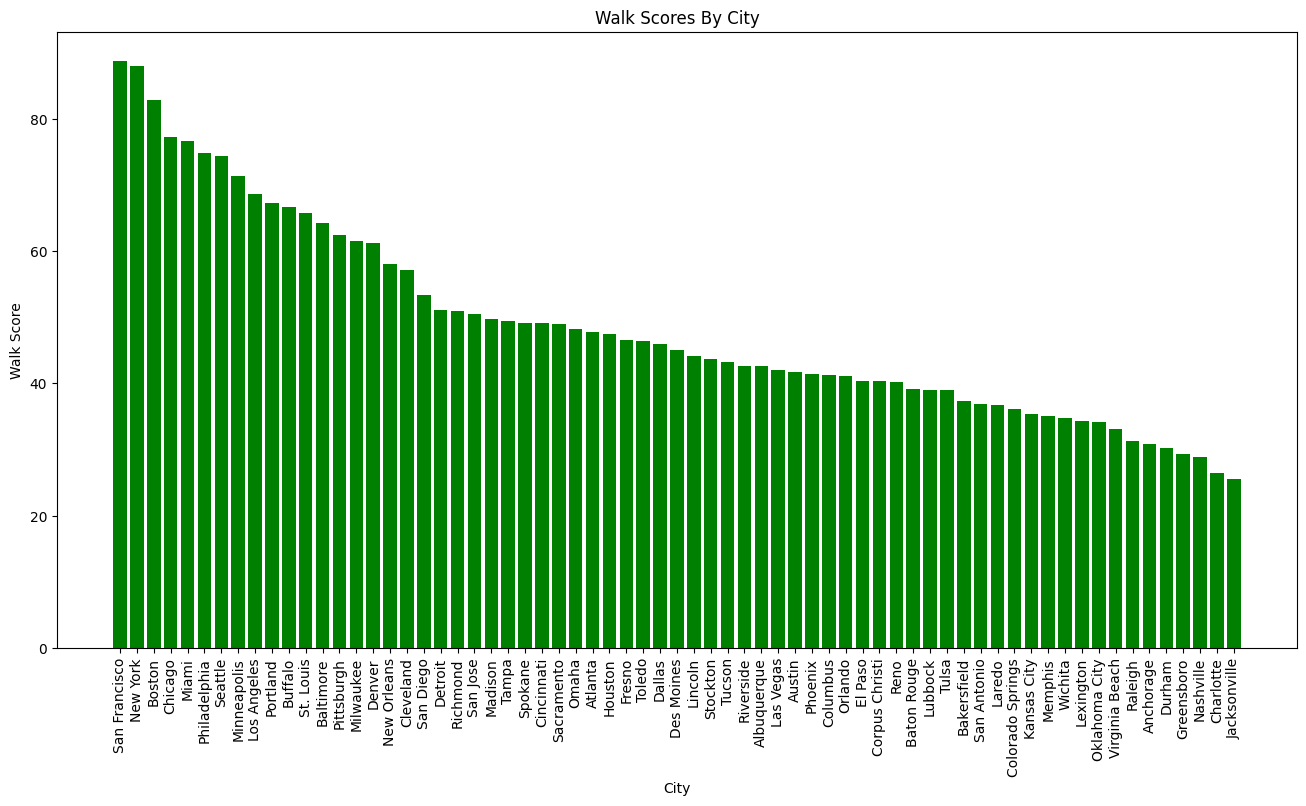

In [64]:
combined_data_sorted = combined_data.sort_values(by="Walk Score", ascending=False)

plt.figure(figsize=(16, 8))

plt.bar(combined_data_sorted["City"], combined_data_sorted["Walk Score"], width=0.8, bottom=0,align='center', color='green')

plt.xticks(rotation=90)

plt.xlabel("City")
plt.ylabel("Walk Score")
plt.title("Walk Scores By City")

plt.show()


### Now, let's look at a visualization of the ratio of amenities to population by city. The higher the ratio, the more amenities are available for each person.

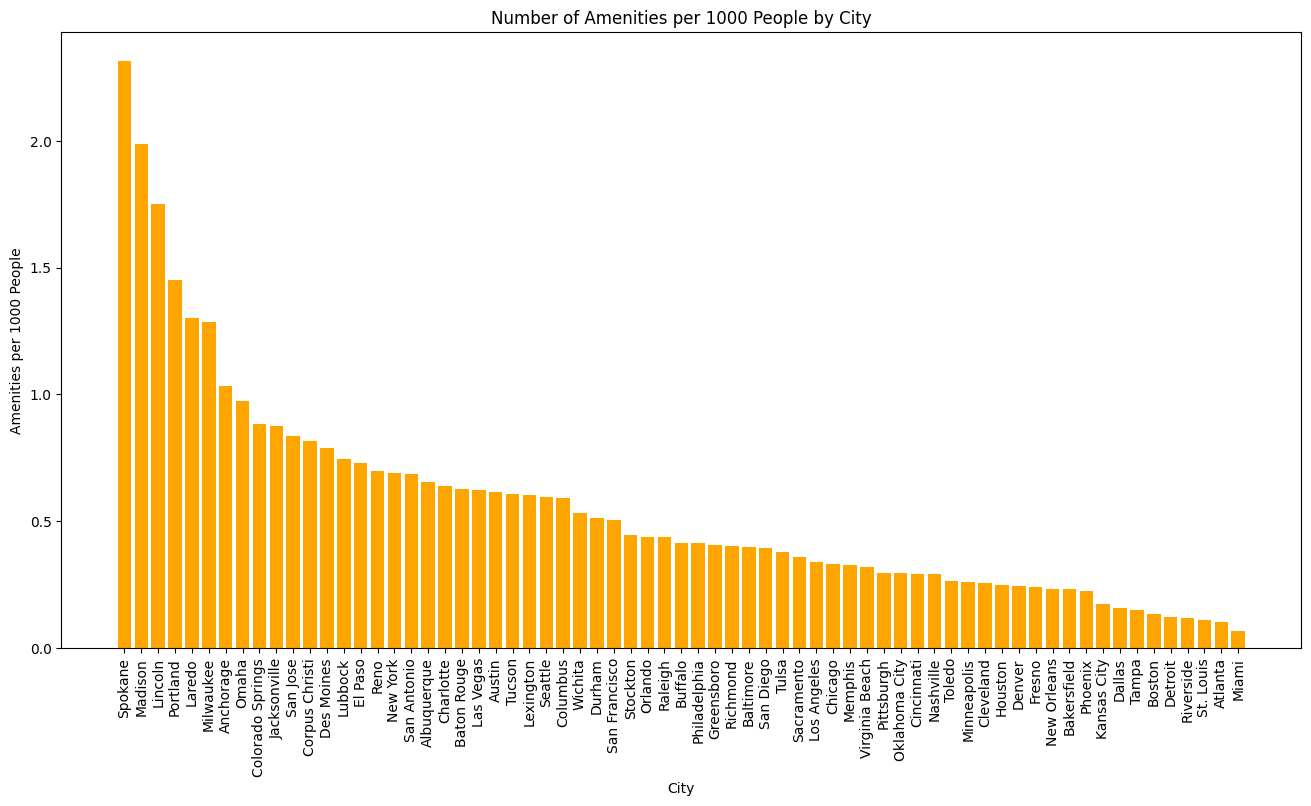

In [65]:
combined_data_sorted = combined_data.sort_values(by="Amenities by Pop", ascending=False)

plt.figure(figsize=(16, 8))

plt.bar(combined_data_sorted["City"], combined_data_sorted["Amenities by Pop"], width=0.8, bottom=0,align='center', color='orange')

plt.xticks(rotation=90)

plt.xlabel("City")
plt.ylabel("Amenities per 1000 People")
plt.title("Number of Amenities per 1000 People by City")

plt.show()

### Let's look at a visualization of the ratio of cost of living to amenities by city. The higher the ratio the more each amenity costs, meaning that people are paying more for each amenity they have. Lower amenity cost means that the cost of living is spread across a larger number of amenities. 

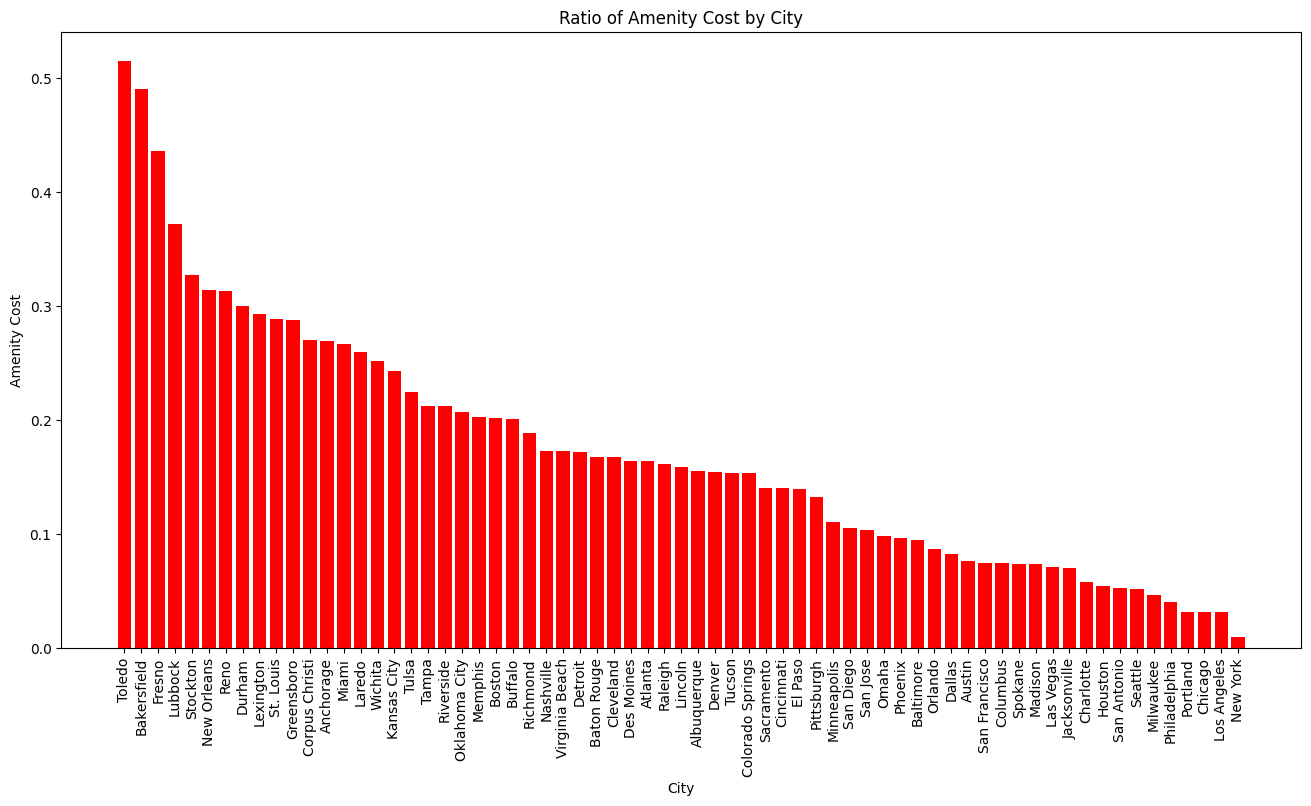

In [66]:
combined_data_sorted = combined_data.sort_values(by="Amenity Cost", ascending=False)

plt.figure(figsize=(16, 8))

plt.bar(combined_data_sorted["City"], combined_data_sorted["Amenity Cost"], width=0.8, bottom=0,align='center', color='red')

plt.xticks(rotation=90)

plt.xlabel("City")
plt.ylabel("Amenity Cost")
plt.title("Ratio of Amenity Cost by City")

plt.show()

### Let's now look at what cities offer the most amenities by 1000 people AND have the best Walk Score. 

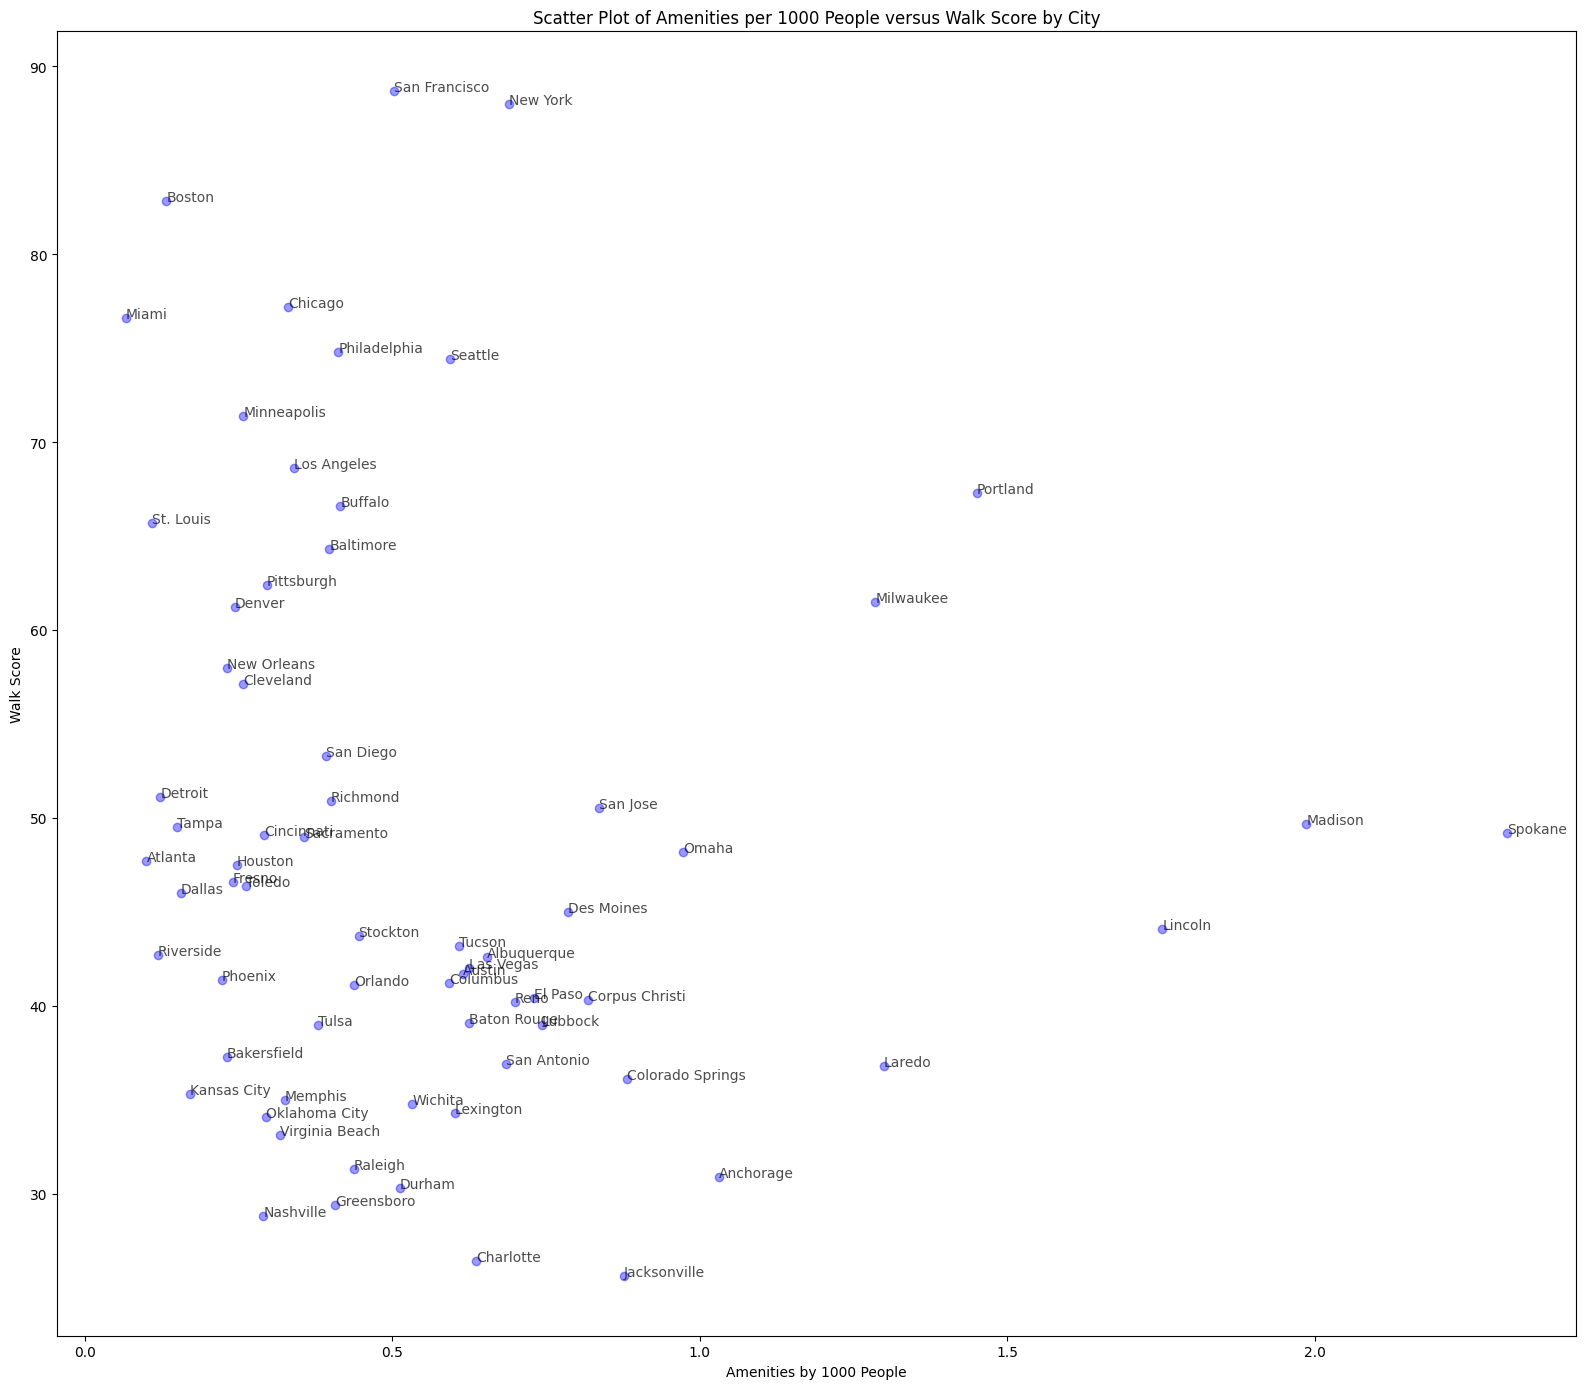

In [67]:
plt.figure(figsize=(16, 14))
plt.scatter(combined_data['Amenities by Pop'], combined_data['Walk Score'], color='blue', alpha=0.4)

for i in range(len(combined_data)):
    plt.annotate(combined_data["City"][i], (combined_data["Amenities by Pop"][i], combined_data["Walk Score"][i]), textcoords='data', alpha=0.7)
   
plt.ylabel("Walk Score")
plt.xlabel("Amenities by 1000 People")
plt.title("Scatter Plot of Amenities per 1000 People versus Walk Score by City")

plt.tight_layout()
plt.show()

## Part 5: Data Interpretation:
